# IRIS SPECIES  DATASET

This is dataset to classify iris species. There are 3 different species to classify into and 4 features to input. First I'll import all the required libraries.

In [1]:
import matplotlib.pyplot as plt #visualization
import numpy as np #storing and manipulating data in structures (arrays)
from sklearn.model_selection import KFold  #check for overfitting
from sklearn.neighbors import KNeighborsClassifier #classification model to be used 
from sklearn.metrics import accuracy_score,confusion_matrix #assessing the accuracy of the model.
import pandas as pd #loading from and saving to csv files
%matplotlib inline


I'll then load the dataset. I'll drop the first column since it is just for indexing the rows.

In [2]:
df=pd.read_csv("C:/Users/Sylvia/Desktop/comp improvement/data science/Challenge1_HowCrispCanYouClassify-master/data/iris_train.csv")
df=df.drop(df.columns[[0]],axis = 1)


I'll get the dataset in array format.

In [3]:
x= df.values[:,0:4] #the array of features
y = df.values[:,4] #the array of output values


I'll get the mean for the input values.

In [4]:
#I'll get for each species.
array=[]


array.append(df.loc[df['labels']=='Iris-virginica'].values[:,0:4])
array.append(df.loc[df['labels']=='Iris-versicolor'].values[:,0:4])
array.append(df.loc[df['labels']=='Iris-setosa'].values[:,0:4])
for i in array:
   
    mean = np.mean(i,axis = 0)
    
    print(mean)

    

[6.725714285714286 2.9885714285714284 5.637142857142857 2.0257142857142854]
[5.905263157894735 2.7263157894736842 4.234210526315789 1.3026315789473681]
[5.064864864864864 3.483783783783783 1.4783783783783784 0.24324324324324326]


I'll construct a scatter plot for each species. 
1. - Column 0 vs Column 1
2. - Column 1 vs Column 2
3. - Column 2 vs Column 3

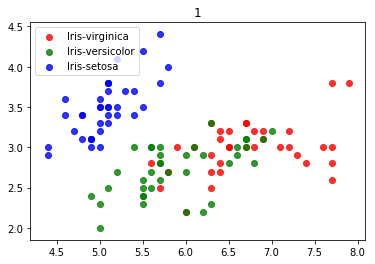

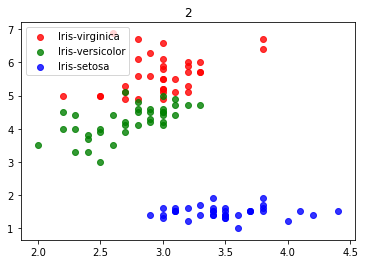

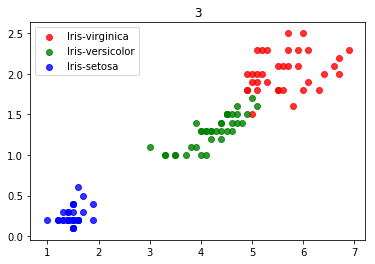

In [5]:


for i in range (3):
    
    virginica=array[0][:,i:i+2].T
    versicolor=array[1][:,i:i+2].T
    setosa= array[2][:,i:i+2].T
    
    data = (virginica,versicolor,setosa)
    colors = ("red","green","blue")
    species = ('Iris-virginica','Iris-versicolor','Iris-setosa')
    
    for k,col,specie in zip(data,colors,species):
        plt.subplot()
        xP,yP = k[0],k[1]
        plt.scatter(xP,yP,alpha= 0.8,c=col,label=specie)
    plt.title(i+1)
    plt.legend(loc=2)
    plt.show()

   
    

The third scatter plot i.e Column 2 vs Column 3 shows that you can classify the species using linear regression. However Iris-versicolor and Iris-virginica may fall on either side.

I will use k nearest neighbours to classify the iris species and to ensure that I do not overfit I'll use k-fold validation of 10 folds because it the conventional k value. I am also using 5 neighbours because it performed better that all values between 2 and 10.


In [6]:
neigh = KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits = 10 ,random_state = None, shuffle = False)
for train_indices,test_indices in kf.split(x):
    X_Train, X_Test = x[train_indices],x[test_indices]
    Y_Train, Y_Test = y[train_indices],y[test_indices]
    neigh.fit(X_Train,Y_Train)
    y_pred = neigh.predict(X_Test)
    print(accuracy_score(Y_Test,y_pred))

0.909090909091
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.909090909091
1.0


It is clear that the model isn't overfitting so I will go and use it to predict the test data

In [7]:
neighAll = KNeighborsClassifier(n_neighbors=5)
neighAll.fit(x,y)
y_predAll = neighAll.predict(x)
print(accuracy_score(y,y_predAll))

0.990909090909


I would like to assess the accuracy much further using a confusion matrix.The columns indicate prediction and rows indicate the actual values as per the labels. 

In [8]:
labels = ["Iris-virginica","Iris-versicolor","Iris-setosa"]
print(confusion_matrix(y,y_predAll,labels=labels))

[[35  0  0]
 [ 1 37  0]
 [ 0  0 37]]


From the scatter plot it can be seen that iris-virginica and iris-versicolor do tend to be wrongly classified.

Loading the test files. 

In [9]:
dfTest=pd.read_csv("C:/Users/Sylvia/Desktop/comp improvement/data science/Challenge1_HowCrispCanYouClassify-master/data/iris_test.csv")
dfTest=dfTest.drop(dfTest.columns[[0]],axis = 1)
xTest= df.values[:,0:4]

Predicting the test values. 

In [10]:
prediction= neighAll.predict(xTest)
submission = pd.DataFrame(prediction,columns=['labels']).to_csv('iris_submission.csv')